In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/jhn/Envs/dcprogsgcc/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/jhn/Envs/dcprogsgcc/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
from collections import OrderedDict

In [3]:
from dcpyps import mechanism
from dcpyps.samples import samples

In [4]:
def constrain(mec):
    for i in range(len(mec.Rates)):
        mec.Rates[i].fixed = False
    # Constrained rates.
    mec.Rates[21].is_constrained = True
    mec.Rates[21].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[21].constrain_args = [20, 1.5]
    mec.Rates[18].is_constrained = True
    mec.Rates[18].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[18].constrain_args = [19, 2]
    mec.Rates[14].is_constrained = True
    mec.Rates[14].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[14].constrain_args = [12, 3]
    mec.Rates[13].is_constrained = True
    mec.Rates[13].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[13].constrain_args = [12, 2]
    mec.Rates[15].is_constrained = True
    mec.Rates[15].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[15].constrain_args = [17, 3]
    mec.Rates[16].is_constrained = True
    mec.Rates[16].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[16].constrain_args = [17, 2]
    mec.update_constrains()
    mec.set_mr(True, 9, 0)
    mec.set_mr(True, 11, 1)
    mec.update_constrains()
    return mec

In [5]:
mec_true = samples.GlyR_flip()
ig = [4200, 28000, 130000, 3400, 2100, 6700, 180, 6800, 22000,
    29266, 18000, 948, 302, 604, 906, 1.77e6, 1.18e6, 0.59e6, 300e6, 150e6,
    2500, 3750]
mec_true.set_rateconstants(ig)
mec_true = constrain(mec_true)
mec = samples.GlyR_flip()
mec = constrain(mec)

In [6]:
os.chdir("results")

In [7]:
r = []
x = []
lik = []
cputime = []
for file in glob.glob("*.result"):
    with open(file, 'rb') as f:
        content = pickle.load(f)
    #print (np.exp(content[0].x))
    mec.theta_unsqueeze(np.exp(content[0].x))
    mec.update_constrains()
    x.append(np.exp(content[0].x))
    r.append(mec.unit_rates())
    lik.append(-content[0].fun)
    cputime.append(content[1])
rates = np.array(r)

In [8]:
rate_names = []
true_rates = []
for i in range(len(mec.unit_rates())):
    rate_names.append(mec.Rates[i].name)
    true_rates.append(mec_true.Rates[i].unit_rate())

In [69]:
trueratesdf = pd.DataFrame({rate_names[i]: true_rates[i] for i in range(len(rate_names))}, index=np.arange(1))
datadict = {rate_names[i]: rates[:,i] for i in range(len(rate_names))}
datadict['likelihood'] = lik
datadict['cputime'] = cputime
datadf = pd.DataFrame(datadict)
trueratesser = pd.Series(true_rates, index=rate_names)

In [72]:
trueratesser

beta1      4.200000e+03
beta2      2.800000e+04
beta3      1.300000e+05
alpha1     3.400000e+03
alpha2     2.100000e+03
alpha3     6.700000e+03
delta1     1.800000e+02
delta2     6.800000e+03
delta3     2.200000e+04
gamma1     2.926660e+04
gamma2     1.800000e+04
gamma3     9.480912e+02
k(-1)      3.020000e+02
2k(-2)     6.040000e+02
3k(-3)     9.060000e+02
3k(+1)     1.770000e+06
2k(+2)     1.180000e+06
k(+3)      5.900000e+05
2kf(+2)    3.000000e+08
kf(+3)     1.500000e+08
2kf(-2)    2.500000e+03
3kf(-3)    3.750000e+03
dtype: float64

In [73]:
datadf
datadf.head()

,2k(+2),2k(-2),2kf(+2),2kf(-2),3k(+1),3k(-3),3kf(-3),alpha1,alpha2,alpha3,...,delta1,delta2,delta3,gamma1,gamma2,gamma3,k(+3),k(-1),kf(+3),likelihood
0,1.143842e+06,607.283879,2.764668e+08,2713.639653,1.715763e+06,910.925819,4070.459479,3099.109509,2030.002390,5206.257233,...,291.048872,6882.979615,18045.261569,42337.938717,18510.735103,897.209280,571920.897484,303.641940,1.382334e+08,80684.275444
1,1.195843e+06,624.061928,3.291649e+08,2781.256985,1.793765e+06,936.092892,4171.885478,3070.981137,1917.875446,6293.112709,...,204.913121,6990.218680,23881.870088,33793.837701,18665.202554,1032.486721,597921.691322,312.030964,1.645825e+08,364106.923360
2,1.220328e+06,602.571114,3.404442e+08,2924.324531,1.830492e+06,903.856670,4386.486796,3423.770717,2421.473997,6332.076279,...,149.207955,6056.227926,55006.066675,29243.790434,20648.649760,3262.479551,610163.861003,301.285557,1.702221e+08,81477.856135
3,1.146491e+06,588.020013,3.343530e+08,3064.451951,1.719736e+06,882.030019,4596.677927,3206.321820,1970.885604,5408.587995,...,186.925562,6841.264945,24182.687469,30411.405259,19889.794686,1256.390228,573245.414592,294.010006,1.671765e+08,363191.311106
4,1.147709e+06,596.066615,3.599258e+08,3049.693528,1.721564e+06,894.099923,4574.540292,2857.164033,2086.547466,5578.791036,...,176.286383,6979.508241,23186.856041,32284.930069,20853.844396,1130.273097,573854.501021,298.033308,1.799629e+08,363381.492633


In [74]:
meandf = pd.DataFrame({'Mean'  : datadf[rate_names].mean(),
                       'CV%'   : 100*datadf[rate_names].std(ddof=0)/datadf[rate_names].mean(),
                       'Bias%' : (100*(datadf[rate_names].mean()/trueratesser - 1)),
                       'True'  : trueratesser})
meandf.reindex(columns=['True', 'Mean', 'CV%', 'Bias%'])

,True,Mean,CV%,Bias%
beta1,4.200000e+03,4.204918e+03,13.752663,0.117087
beta2,2.800000e+04,3.180431e+04,15.860729,13.586822
beta3,1.300000e+05,1.330140e+05,3.575103,2.318480
alpha1,3.400000e+03,3.131469e+03,5.905480,-7.897958
alpha2,2.100000e+03,2.085357e+03,8.502615,-0.697287
alpha3,6.700000e+03,5.763765e+03,8.042391,-13.973656
delta1,1.800000e+02,2.016764e+02,23.896479,12.042432
delta2,6.800000e+03,6.750040e+03,5.207167,-0.734708
delta3,2.200000e+04,2.886055e+04,45.952414,31.184311
gamma1,2.926660e+04,3.361438e+04,13.778795,14.855775


Red line - true value


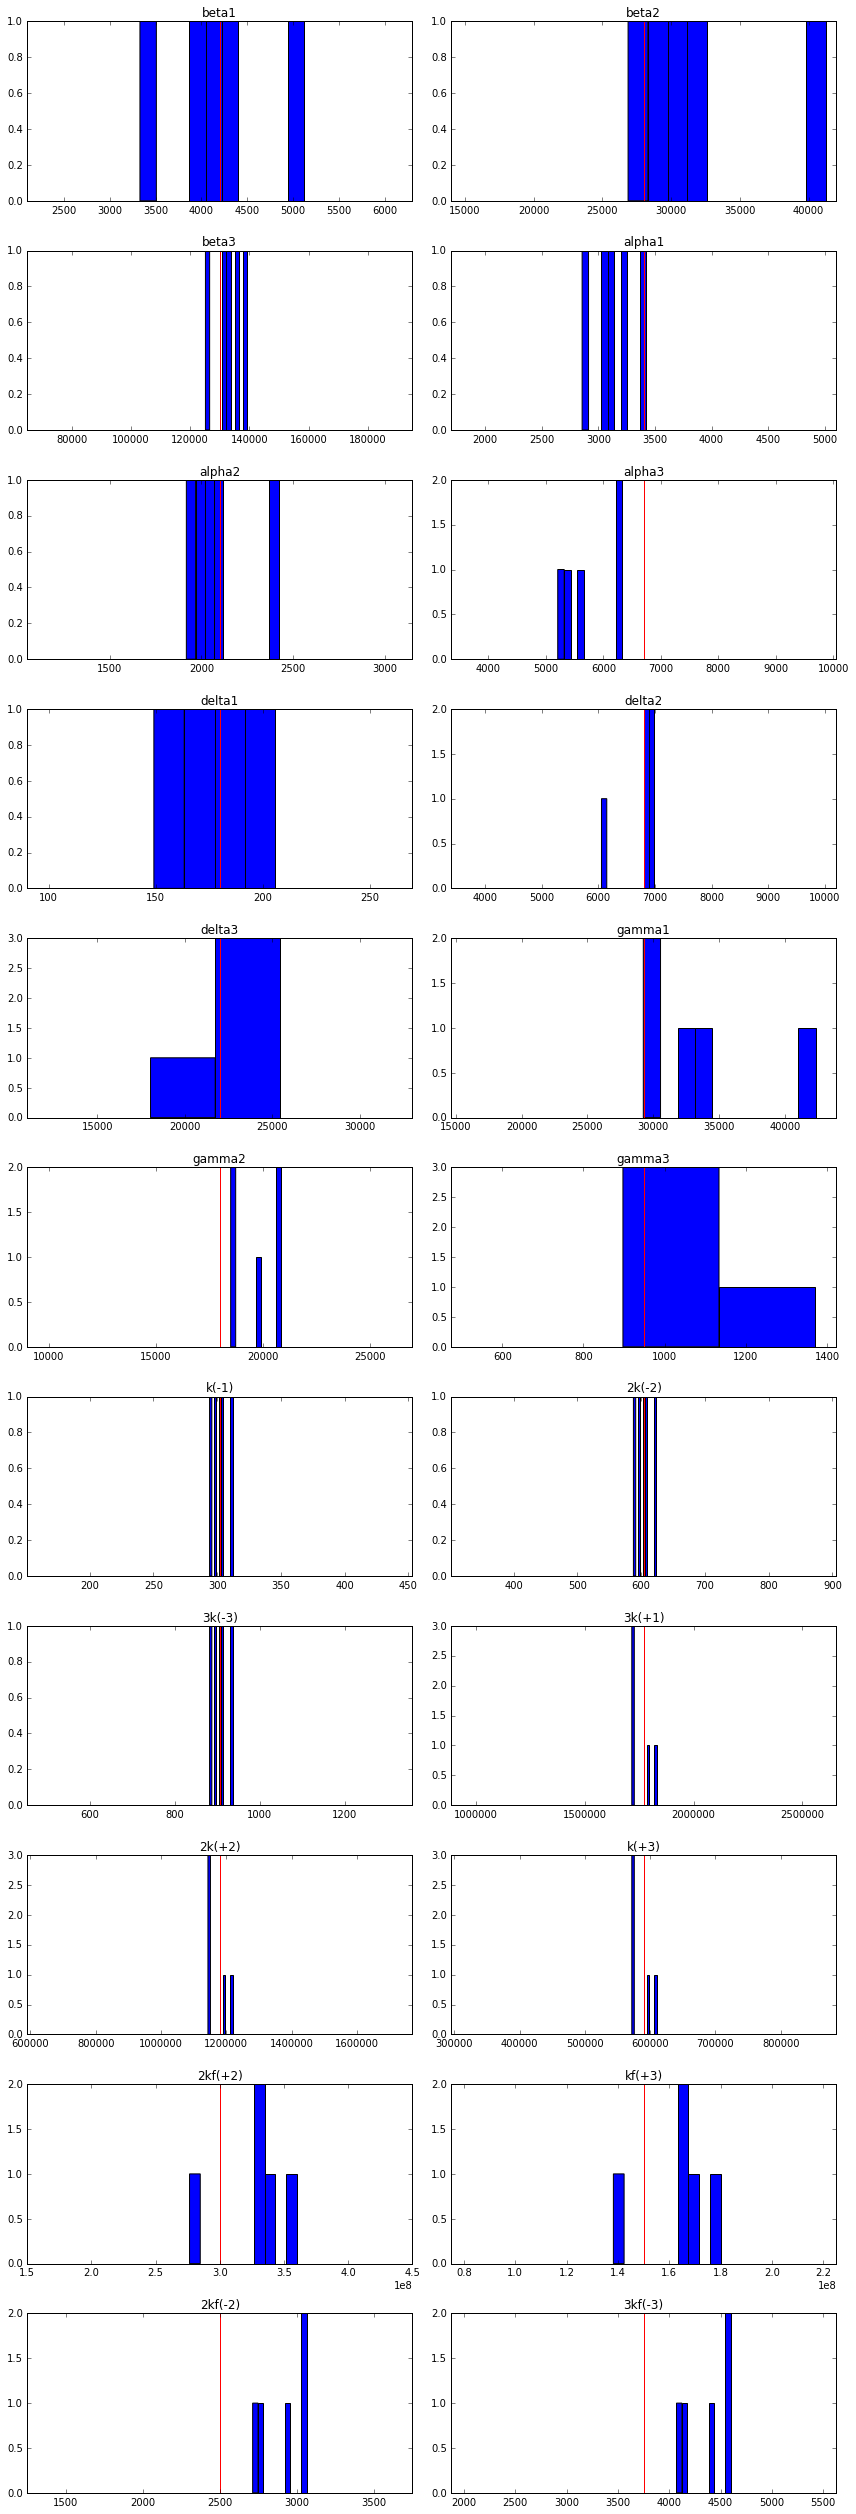

In [78]:
fig,axes = plt.subplots(11, 2, figsize=(12,35))
for i,axis in enumerate(axes.ravel()):
    rate = rate_names[i]
    axis.hist(datadf[rate])
    axis.set_title(rate)
    axis.axvline(trueratesdf[rate][0], color='r')
    axis.set_title(rate)
    axis.set_xlim(trueratesdf[rate][0] * 0.5, 1.5 * trueratesdf[rate][0])
fig.tight_layout()
print('Red line - true value')

In [51]:
def plot_intersection(name1, name2):
    fig, ax  = plt.subplots(1,1, figsize=(10,3))
    ax.plot(name1, name2, 'b.', data=datadf)
    ax.axvline(trueratesdf[name1][0], color='r')
    ax.axhline(trueratesdf[name2][0], color='r')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)
    fig.tight_layout()

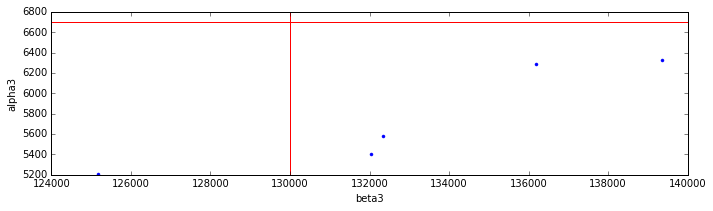

In [52]:
name1 = 'beta3'
name2 = 'alpha3'
plot_intersection(name1, name2)

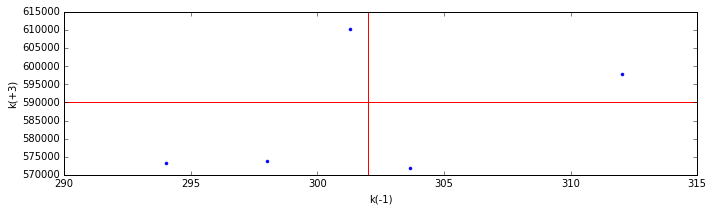

In [53]:
plot_intersection(rate_names[12], rate_names[17])


Mean CPU time =  51.4601554


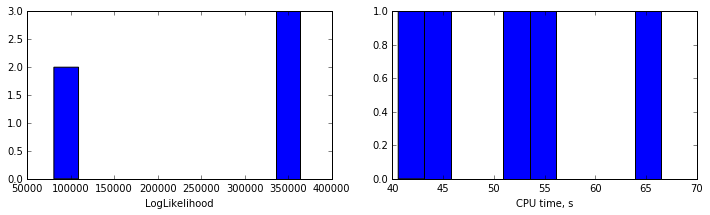

In [77]:
fig, axes  = plt.subplots(1,2, figsize=(12,3))
axes[0].hist(datadf['likelihood'])
axes[0].set_xlabel('LogLikelihood')
axes[1].hist(datadf['cputime'])
axes[1].set_xlabel('CPU time, s')
print('Mean CPU time = ', np.mean(cputime))